# Hypothesis Testing Examples

In this notebook I will perform hypothesis testing analysis on some problems that I found online.

In [29]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = (20, 9)
np.random.seed(42)

## Examples are from [Introductory Business Statistics](https://openstax.org/books/introductory-business-statistics/pages/9-4-full-hypothesis-test-examples)

## Example 9.8

### Method 1

### t statstics

In [30]:
n = 15
t_stat = (16-16.43) / (0.8/np.sqrt(n))
print(t_stat)

-2.081728548586485


### critical value for left tailed test

In [31]:
t_critical = stats.t.ppf(q=0.05, df=n-1)
print(t_critical)

-1.7613101357748564


### p value

In [32]:
p_value = stats.t.sf(np.abs(t_stat), n-1)
print(p_value)

0.028099370183143364


### Method 2

In [33]:
mu = 16
sigma = 0.8
s = np.random.normal(mu, sigma, n)
print(s.mean())
t_stat, p_value = stats.ttest_1samp(s, popmean=16.43, alternative='less')
print(t_stat, p_value)

16.00827881946667
-2.053650919110211 0.02959053546760934


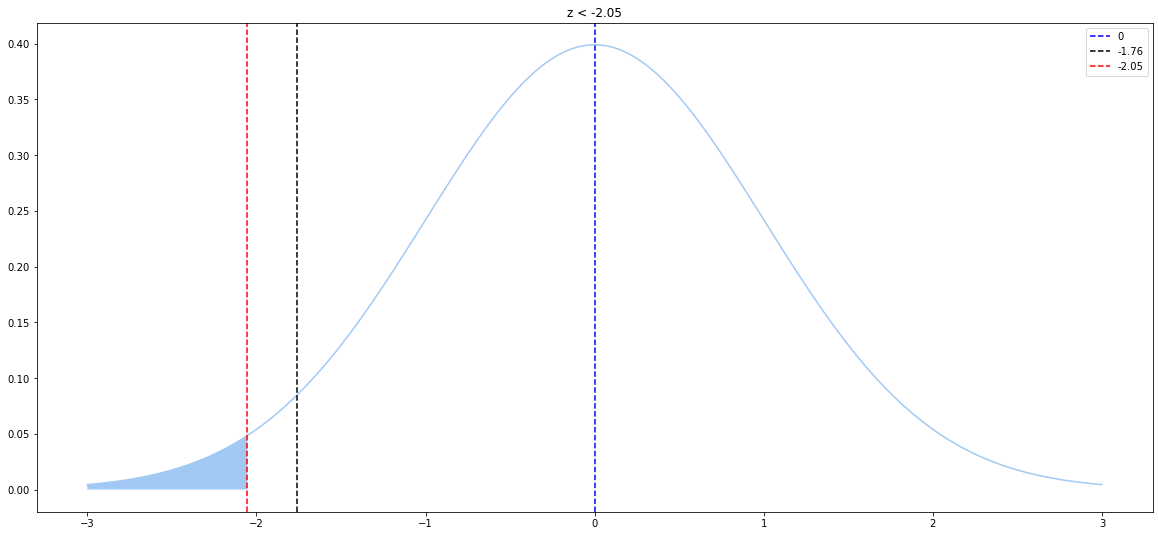

In [34]:
x = np.arange(-3, 3, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1))
z = x[x<t_stat]
plt.fill_between(z, 0, stats.norm.pdf(z, 0, 1))
plt.axvline(0, color='b', linestyle='--', label=0)
plt.axvline(t_critical, color='k', linestyle='--', label=f'{t_critical:0.2f}')
plt.axvline(t_stat, color='r', linestyle='--', label=f'{t_stat:0.2f}')
plt.title(f"z < {t_stat:0.2f}")
plt.legend()
plt.show()

## Example 9.9

### Method 1<br>
### t statstics

In [35]:
t_stat = (108-100) / (12/np.sqrt(16))
print(t_stat)

2.6666666666666665


### critical value for right tailed test

In [36]:
t_critical = stats.t.ppf(q=1-0.05, df=(16-1))
print(t_critical)

1.7530503556925547


### p value

In [37]:
p_value = stats.t.sf(np.abs(t_stat), 16-1)
print(p_value)

0.008797576534081851


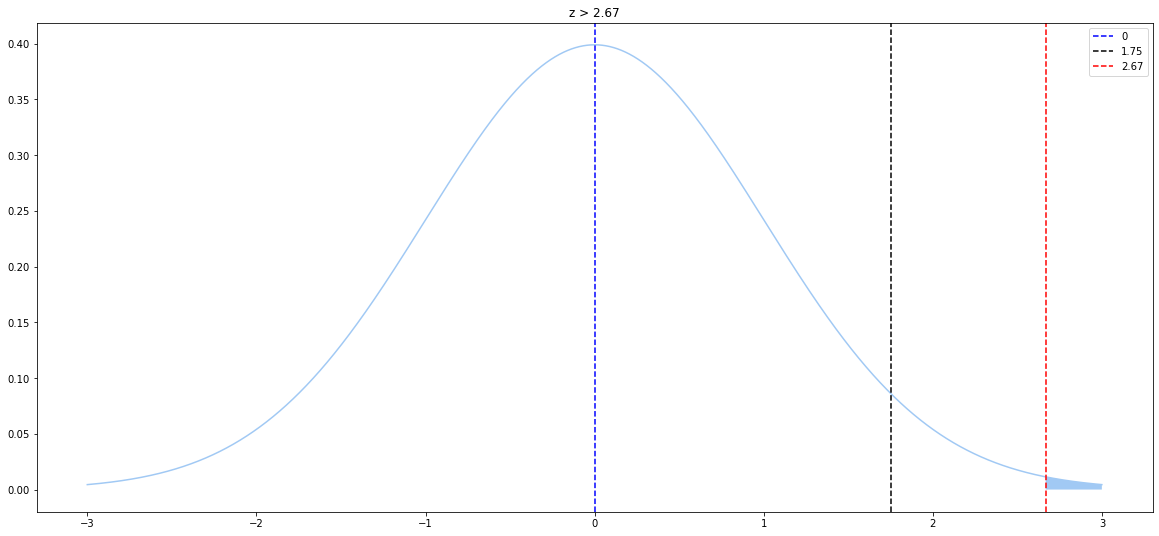

In [38]:
x = np.arange(-3, 3, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1))
z = x[x>t_stat]
plt.fill_between(z, 0, stats.norm.pdf(z, 0, 1))
plt.axvline(0, color='b', linestyle='--', label=0)
plt.axvline(t_critical, color='k', linestyle='--', label=f'{t_critical:0.2f}')
plt.axvline(t_stat, color='r', linestyle='--', label=f'{t_stat:0.2f}')
plt.title(f"z > {t_stat:0.2f}")
plt.legend()
plt.show()

**t_stat is larger than critical value**<br>
**p_value is smaller than 0.05**<br>
**Therefore we should reject null hypothesis that H0: mu <= 100**

### Method 2

In [39]:
mu = 108
sigma = 12
s = np.random.normal(mu, sigma, 16)
print(s.mean())
t_stat, p_value = stats.ttest_1samp(s, popmean=100, alternative='greater')
print(t_stat, p_value)

103.19899398542957
1.4153029910258041 0.08870276879918516


**p_value is smaller than 0.05**<br>
**we should reject null hypothesis**

### Confidence Interval

In [40]:
alpha = 0.05
dof = 16 - 1
# percent-point function or quantile function of the t-distribution
t = stats.t.ppf(1 - (alpha / 2), dof)
# standard error of mean
sem = np.std(s, ddof=1) / np.sqrt(16)
# margin of error
d = t * sem
upper_ci = s.mean() + d
lower_ci = s.mean() - d
display(f'95% confidence interval is between {lower_ci} to {upper_ci}')

'95% confidence interval is between 98.38130171760722 to 108.01668625325192'

## Example 9.10

In [41]:
t_stat = (7.91-8.0) / (np.sqrt(0.03)/np.sqrt(35))
print(t_stat)
t_critical = stats.norm.ppf(q=(1-0.005))
print(t_critical)
p_value = stats.norm.sf(np.abs(t_stat)) * 2
print(p_value)

-3.0740852297878747
2.5758293035489004
0.0021114910066706333


**At 99% significance level the critical value is 2.575**<br>
**t-test of 3.07 is larger than 2.575**<br>
**We should reject the null hypothesis that the machine is filling properly at the mean of 8 ounces**<br>
**The machine will need repair**

#